In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

These two models will show the difference between average temp and minimum temp with their corresponding day of the year.

In [2]:
# Reads in observation csv
File_path = "../resources/observation_data.csv"
observation_df = pd.read_csv(File_path)
observation_df

,station_uid,date,maxt,mint,pcpn,snow,snwd,avgt,freeze_day,above_freezing,...,maxt_7_day,mint_7_day,avgt_7_day,precip_7_day,obs_count_7_day,maxt_30_day,mint_30_day,avgt_30_day,precip_30_day,obs_count_30_day
0,10392,2003-03-05,43.0,28.0,0.00,NaN,NaN,35.5,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10392,2003-03-06,43.0,31.0,0.00,NaN,NaN,37.0,1,1,...,43.0,28.0,35.500000,0.00,1.0,43.0,28.0,35.500000,0.00,1.0
2,10392,2003-03-07,45.0,20.0,0.00,NaN,NaN,32.5,1,1,...,43.0,28.0,36.250000,0.00,2.0,43.0,28.0,36.250000,0.00,2.0
3,10392,2003-03-08,59.0,32.0,0.00,NaN,NaN,45.5,1,1,...,45.0,20.0,35.000000,0.00,3.0,45.0,20.0,35.000000,0.00,3.0
4,10392,2003-03-09,55.0,30.0,0.00,NaN,NaN,42.5,1,1,...,59.0,20.0,37.625000,0.00,4.0,59.0,20.0,37.625000,0.00,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,10685,2004-05-12,77.0,63.0,1.65,0.0,NaN,70.0,0,1,...,85.0,40.0,61.428571,0.10,7.0,85.0,21.0,46.500000,3.25,30.0
6408,10685,2004-05-13,92.0,52.0,0.13,NaN,NaN,72.0,0,1,...,85.0,46.0,64.000000,1.75,7.0,85.0,21.0,47.200000,4.90,30.0
6409,10685,2004-05-14,75.0,56.0,0.00,0.0,NaN,65.5,0,1,...,92.0,46.0,66.357143,1.88,7.0,92.0,21.0,47.950000,4.35,30.0
6410,10685,2004-05-15,74.0,57.0,0.00,0.0,NaN,65.5,0,1,...,92.0,52.0,67.285714,1.88,7.0,92.0,21.0,48.883333,4.35,30.0


In [3]:
# First dataframe is the average temp with its corresponding day of the year
dayofyear_avgt_df = observation_df[["avgt", "obs_dayofyear"]].copy()
dayofyear_avgt_df

,avgt,obs_dayofyear
0,35.5,64
1,37.0,65
2,32.5,66
3,45.5,67
4,42.5,68
...,...,...
6407,70.0,133
6408,72.0,134
6409,65.5,135
6410,65.5,136


In [4]:
# Day 182 of the year is July 1
dayofyear_avgt_df.drop(dayofyear_avgt_df[dayofyear_avgt_df["obs_dayofyear"] > 182].index, inplace=True)
dayofyear_avgt_df

,avgt,obs_dayofyear
0,35.5,64
1,37.0,65
2,32.5,66
3,45.5,67
4,42.5,68
...,...,...
6407,70.0,133
6408,72.0,134
6409,65.5,135
6410,65.5,136


In [5]:
dayofyear_avgt_df = dayofyear_avgt_df.dropna()

In [6]:
dayofyear_avgt_df = dayofyear_avgt_df.reset_index(drop=True)

In [7]:
# Second dataframe is the min temp with its corresponding day of the year
dayofyear_mint_df = observation_df[["mint", "obs_dayofyear"]].copy()
dayofyear_mint_df

,mint,obs_dayofyear
0,28.0,64
1,31.0,65
2,20.0,66
3,32.0,67
4,30.0,68
...,...,...
6407,63.0,133
6408,52.0,134
6409,56.0,135
6410,57.0,136


In [8]:
# Day 182 of the year is July 1
dayofyear_mint_df.drop(dayofyear_mint_df[dayofyear_mint_df["obs_dayofyear"] > 182].index, inplace=True)
dayofyear_mint_df

,mint,obs_dayofyear
0,28.0,64
1,31.0,65
2,20.0,66
3,32.0,67
4,30.0,68
...,...,...
6407,63.0,133
6408,52.0,134
6409,56.0,135
6410,57.0,136


In [9]:
dayofyear_mint_df = dayofyear_mint_df.dropna()

In [10]:
dayofyear_mint_df = dayofyear_mint_df.reset_index(drop=True)

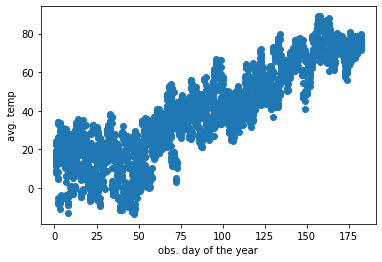

In [11]:
plt.scatter(dayofyear_avgt_df.obs_dayofyear, dayofyear_avgt_df.avgt)
plt.xlabel('obs. day of the year')
plt.ylabel('avg. temp')
plt.show()

In [12]:
X = dayofyear_avgt_df.obs_dayofyear.values.reshape(-1, 1)
y = dayofyear_avgt_df.avgt

In [13]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
y_pred = model.predict(X)
print(y_pred.shape)

(3663,)


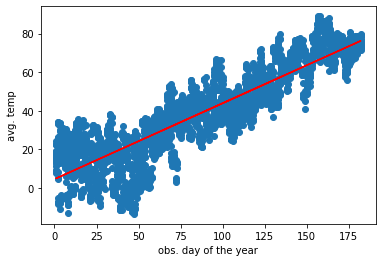

In [15]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('obs. day of the year')
plt.ylabel('avg. temp')
plt.show()

The fit line predicts around day 75 temp is above freezing based on average temps.

In [16]:
print(model.coef_)
print(model.intercept_)

[0.39374674]
4.526881400647518


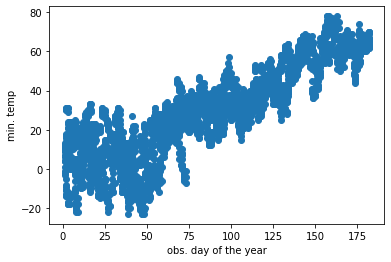

In [17]:
plt.scatter(dayofyear_mint_df.obs_dayofyear, dayofyear_mint_df.mint)
plt.xlabel('obs. day of the year')
plt.ylabel('min. temp')
plt.show()

In [18]:
X = dayofyear_mint_df.obs_dayofyear.values.reshape(-1, 1)
y = dayofyear_mint_df.mint

In [19]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [20]:
y_pred = model.predict(X)
print(y_pred.shape)

(3668,)


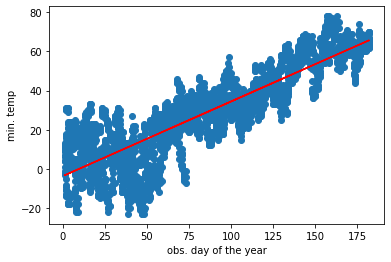

In [21]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('obs. day of the year')
plt.ylabel('min. temp')
plt.show()

The fit line predicts around day 100 temp is above freezing based on minimum temps.

In [22]:
print(model.coef_)
print(model.intercept_)

[0.38092431]
-3.6529204572859193
